# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin, Ethereum, Avalanche, and Chainlink Daily Price Analyses – 18 October Roundup.  The global crypto market has seen a reversal in the pattern of gains as the influx of capital lowered. The recent data shows that Bitcoin, Ethereum, and others couldn&#8217;t continue the positive trend. Thus, the reversal of the pattern has resulted in losses for the overall market. As said earlier, there is a macroeconomic factor &#8230;  Bitcoin, Ethereum, Avalanche, and Chainlink Daily Price Analyses – 18 October Roundup Read More &#187; ... [| Skaityti daugiau](https://www.cryptopolitan.com/bitcoin-ethereum-avalanche-and-chainlink-daily-price-analyses-18-october-roundup/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Facing a fall COVID surge, Tam calls on Canadians to get their bivalent booster shots | CBC News.  Canada's chief public health officer said Tuesday that Canadians should get their dose of a recently authorized bivalent vaccine to stave off a fall resurgence of COVID-19 — a development that could prompt the return of some pandemic-related restrictions. ... [| Skaityti daugiau](http://www.cbc.ca/news/politics/tam-bivalent-shots-fall-resurgence-1.6620555) 

### Kainų kaita pandemijos metu

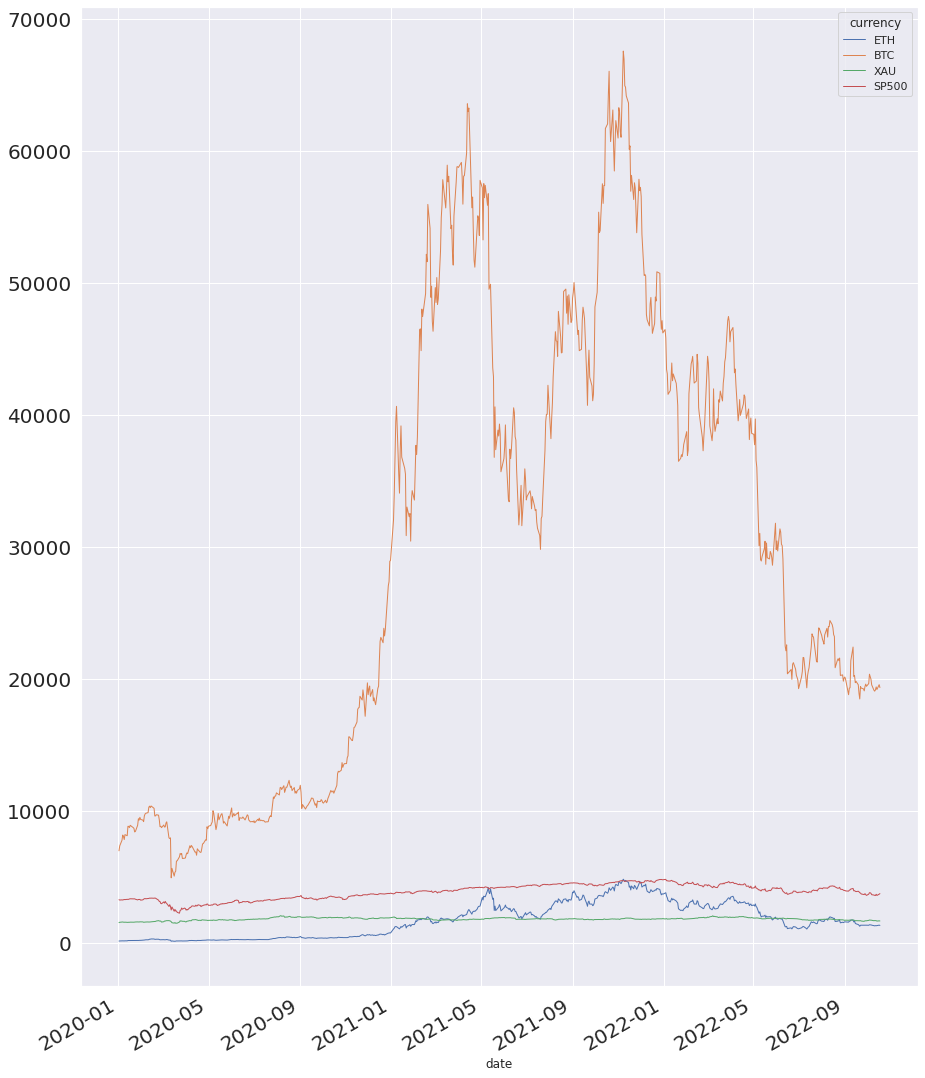

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.897998,0.254023,0.914417
BTC,0.897998,1.000000,0.229378,0.844079
XAU,0.254023,0.229378,1.000000,0.360424
SP500,0.914417,0.844079,0.360424,1.000000


In [8]:
#hide ### Koreliacijos matrica.

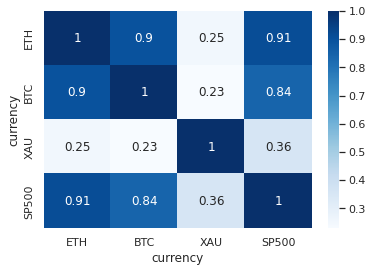

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')